In [90]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [91]:
# Reading the csv into a dataframe.
df_bank = pd.read_csv('https://raw.githubusercontent.com/cmattcasey/ISDS7070/main/bank-additional-full.csv')

In [92]:
# Verifying the data loaded correctly.
df_bank.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [93]:
# Check the datatypes and look for null values.
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [94]:
# Renaming columns that contain a "." and replacing with "_"
df_bank.rename(columns={'emp.var.rate':'emp_var_rate', 'cons.price.idx':'cons_price_idx', 'cons.conf.idx':'cons_conf_idx','nr.employed':'nr_employed',}, inplace=True)

In [95]:
# Missing values are coded as unknown, replacing with NaN
df_bank.replace('unknown', np.NaN, inplace=True)

In [96]:
# Verifying we now see some columns have null values
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [97]:
# Viewing the desciptive statistics
df_bank.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [98]:
# Reviewing value counts for categorical data to replace missing values
df_bank['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

In [99]:
df_bank['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64

In [100]:
df_bank['default'].value_counts()

no     32588
yes        3
Name: default, dtype: int64

In [101]:
df_bank['housing'].value_counts()

yes    21576
no     18622
Name: housing, dtype: int64

In [102]:
df_bank['loan'].value_counts()

no     33950
yes     6248
Name: loan, dtype: int64

In [103]:
df_bank['marital'].value_counts()

married     24928
single      11568
divorced     4612
Name: marital, dtype: int64

In [104]:
# Replacing missing values with the most common value for each column
df_bank['loan'].replace(np.nan, "no", inplace=True)
df_bank['housing'].replace(np.nan, "yes", inplace=True)
df_bank['default'].replace(np.nan, "no", inplace=True)
df_bank['education'].replace(np.nan, "university.degree", inplace=True)
df_bank['job'].replace(np.nan, "admin.", inplace=True)
df_bank['marital'].replace(np.nan, "married", inplace=True)

In [105]:
# Verifying we no longer have any missing values
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [106]:
# Many binary columns have yes and no values, replacing with 1 or 0 to for models which require numeric data
df_bank = df_bank.replace({'yes': 1, 'no': 0})

In [107]:
# Verifying replace was successful
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0,1,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,0,1,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [108]:
# Grouping education data into Higher Education, Some Education and Little Education
df_bank['education'] = df_bank['education'].replace(['university.degree', 'professional.course'],'higher')
df_bank['education'] = df_bank['education'].replace(['high.school', 'basic.9y', 'basic.6y'],'some')
df_bank['education'] = df_bank['education'].replace(['basic.4y', 'illiterate'],'little')

In [109]:
# Checking counts after replacments
df_bank['education'].value_counts()

higher    19142
some      17852
little     4194
Name: education, dtype: int64

Text(0.5, 1.0, 'age distribution')

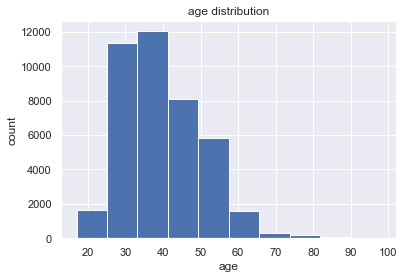

In [110]:
# Creating histogram to view the distrubtion of age
plt.pyplot.hist(df_bank["age"])

# Set x/y labels and plot title
plt.pyplot.xlabel("age")
plt.pyplot.ylabel("count")
plt.pyplot.title("age distribution")

In [111]:
# Creating 4 bins for age
df_bank['bin_age'] = pd.qcut(df_bank.age, q=4, labels=False)

In [112]:
# Verifying creation of age bins
df_bank['bin_age'].unique

<bound method Series.unique of 0        3
1        3
2        1
3        2
4        3
        ..
41183    3
41184    2
41185    3
41186    2
41187    3
Name: bin_age, Length: 41188, dtype: int64>

In [113]:
# Grouping jobs based expected income
# Lower Class Employment Status: student, unemployed, housemaid
# Middle Class Employment Status: blue-collar, technician, retired, services, admin.
# Upper Class Employment Status: management, entrepreneur, self-employed
df_bank['job'] = df_bank['job'].replace(['student', 'unemployed', 'housemaid'],'lower')
df_bank['job'] = df_bank['job'].replace(['blue-collar', 'technician', 'retired', 'services', 'admin.'],'middle')
df_bank['job'] = df_bank['job'].replace(['management', 'entrepreneur', 'self-employed'],'upper')

In [114]:
# Verifying job replacements and counts
df_bank['job'].value_counts()

middle    32438
upper      5801
lower      2949
Name: job, dtype: int64

In [115]:
# This shows how many of each marital category said yes to subscribing to a term deposit
df_bank.groupby(['marital']).y.sum()

marital
divorced     476
married     2544
single      1620
Name: y, dtype: int64

In [116]:
# Calculating the percentage of "yes" by each marital status
print(df_bank[df_bank.marital == 'married'].y.sum()/df_bank[df_bank.marital == 'married'].y.count())

0.1017274472168906


In [117]:
print(df_bank[df_bank.marital == 'single'].y.sum()/df_bank[df_bank.marital == 'single'].y.count())

0.1400414937759336


In [118]:
print(df_bank[df_bank.marital == 'divorced'].y.sum()/df_bank[df_bank.marital == 'divorced'].y.count())

0.10320901994796183


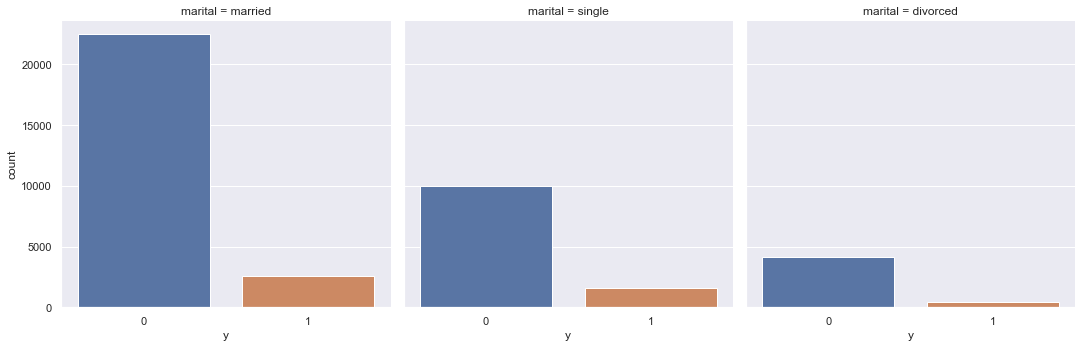

In [119]:
# Exploring marital status impact on subscribed a deposit (y)
sns.catplot(x='y', col='marital', kind='count', data=df_bank, col_wrap=3)

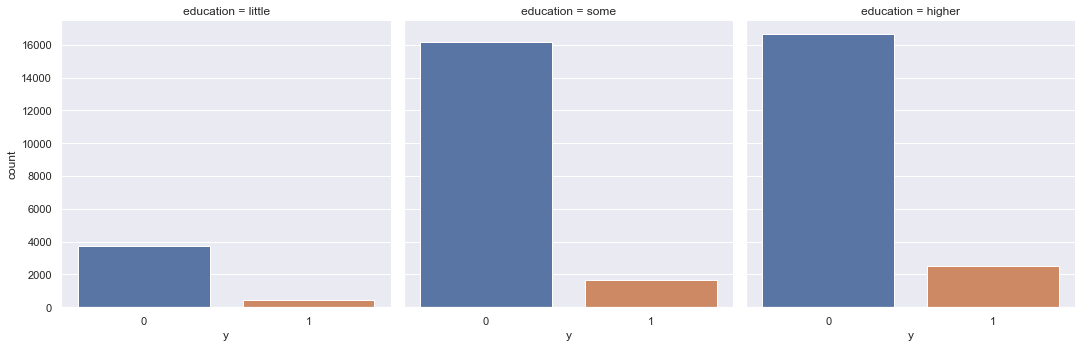

In [120]:
# Exploring education impact on subscribed a deposit (y)
sns.catplot(x='y', col='education', kind='count', data=df_bank, col_wrap=3)

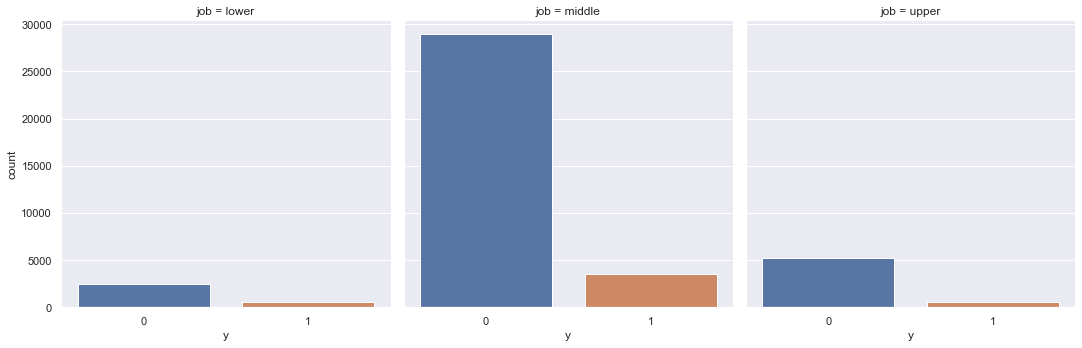

In [121]:
# Exploring job impact on subscribed a deposit (y)
sns.catplot(x='y', col='job', kind='count', data=df_bank, col_wrap=3)

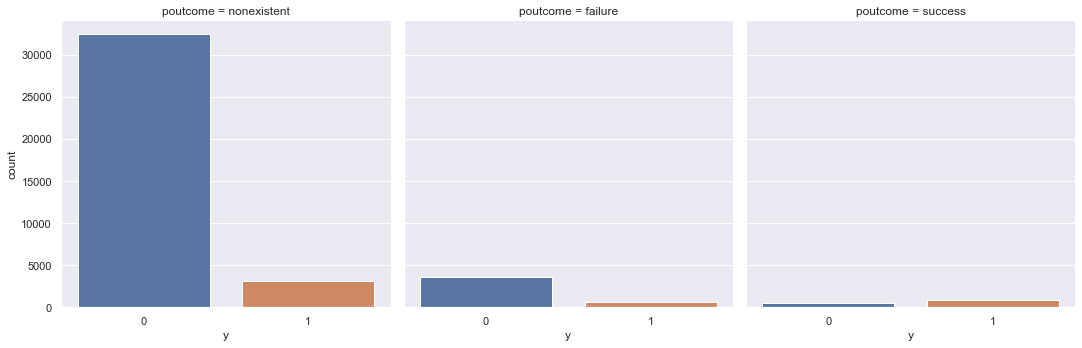

In [122]:
#Exploring previous outcome impact on subscribed a deposit (y)
sns.catplot(x='y', col='poutcome', kind='count', data=df_bank, col_wrap=3)

In [123]:
# Creating dummy variables so that all values are numeric in preparation for modeling
bank_dum = pd.get_dummies(df_bank, drop_first=True)
bank_dum.head()

,age,default,housing,loan,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,0,0,0,261,1,999,0,1.1,93.994,...,1,0,0,0,1,0,0,0,1,0
1,57,0,0,0,149,1,999,0,1.1,93.994,...,1,0,0,0,1,0,0,0,1,0
2,37,0,1,0,226,1,999,0,1.1,93.994,...,1,0,0,0,1,0,0,0,1,0
3,40,0,0,0,151,1,999,0,1.1,93.994,...,1,0,0,0,1,0,0,0,1,0
4,56,0,0,1,307,1,999,0,1.1,93.994,...,1,0,0,0,1,0,0,0,1,0
